In [75]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [5]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [29]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
user_data.shape

(2954, 3)

In [13]:
print(user_data.dtypes)

client     int64
premium     bool
age        int64
dtype: object


In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [17]:
user_data.client.nunique()

2954

In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [14]:
logs.shape

(4500, 4)

In [15]:
print(logs.dtypes)

client       int64
success       bool
platform    object
time         int64
dtype: object


In [30]:
logs.platform.nunique()

3

In [ ]:
# 3.4 needs some extra knowledge
# Какой клиент совершил больше всего успешных операций?
# Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. 
# Например: 12, 123, 456

In [40]:
success_number = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform' : 'count'}) \
    .rename(columns={'platform' : 'success_number'}) \
    .sort_values('success_number', ascending=False) 

In [67]:
success_number.head()

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [43]:
maximum_success = success_number.success_number.max()

In [44]:
maximum_success

41

In [ ]:
#To call some argument that you do not have inside your data we need to use '@' before the name of the argument
#to see result as a list we use 'tolist' function

In [52]:
successful_clients = success_number.query('success_number == @maximum_success') \
        .sort_values('client') \
        .client \
        .tolist()

In [56]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
#I can use only 'sum' in 'agg' not count. Because 'sum' summarize only True (1) arguments and ignore False (0) and NaN.
#To sum Falses and Nan we need 'apply' and 'lambda x'.

In [63]:
success_number_2 = logs.groupby('client', as_index=False) \
    .agg({'success' : 'sum'}) \
    .rename(columns={'success' : 'success_number'}) \
    .sort_values('success_number', ascending=False)

In [64]:
success_number_2.head()

,client,success_number
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41


In [65]:
successful_clients_2 = success_number_2.query('success_number == @maximum_success') \
        .sort_values('client') \
        .client \
        .tolist()

In [66]:
successful_clients_2

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [59]:
success_number.head()

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [ ]:
#С какой платформы было совершено наибольшее количество успешных операций? 
# two variaions of solution: 1) just add platform to success_number_2; 2) use 'query' and group by max, agg as a fisrt solution of previuos question

In [69]:
success_number_platform = logs.groupby(['client', 'platform'], as_index=False) \
    .agg({'success' : 'sum'}) \
    .rename(columns={'success' : 'success_number'}) \
    .sort_values('success_number', ascending=False)

In [70]:
success_number_platform.head()

,client,platform,success_number
2500,61473,phone,33
1442,36165,phone,30
3186,78349,phone,29
1133,28719,phone,28
2596,64064,phone,27


In [ ]:
#Какая платформа наиболее популярна среди премиумных клиентов?

In [71]:
merge_data = user_data.merge(logs, on='client') #if merge the same column is only one 'client' we can skip 'on'

In [72]:
merge_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [74]:
merge_data.query('premium == True') \
    .platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [ ]:
#3.4 task 5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?
Используйте датасет, который вы получили на предыдущем шаге. (chose one of the 4 graphs on the pic)

/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/567478161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_data.query('premium == False').age)
/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/567478161.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

<Axes: xlabel='age', ylabel='Density'>

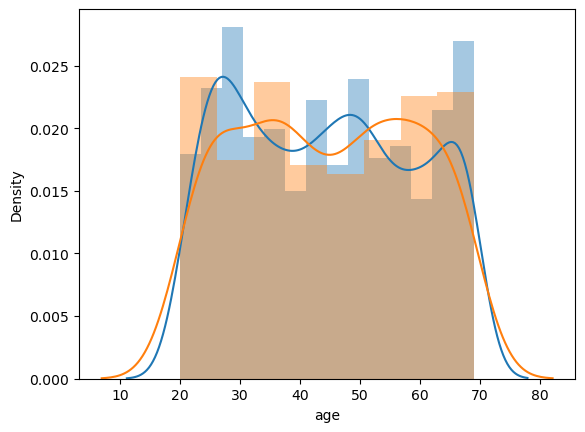

In [86]:
sns.distplot(merge_data.query('premium == False').age)
sns.distplot(merge_data.query('premium == True').age)

In [ ]:
#We create net with two graphs, add some elemets, color we can change and add as # to see all colors in RGB system, ax

In [89]:
ax

array([<Axes: xlabel='age', ylabel='Density'>,
       <Axes: xlabel='age', ylabel='Density'>], dtype=object)

/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/4208135122.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_data.query('premium == False').age, ax=ax[0], color='green')
/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/4208135122.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

<Axes: xlabel='age', ylabel='Density'>

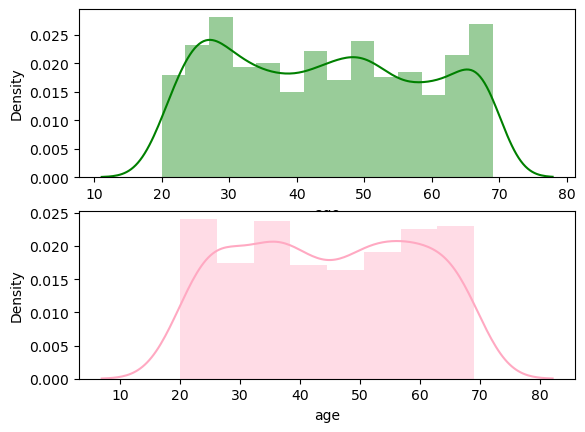

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(merge_data.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(merge_data.query('premium == True').age, ax=ax[1], color='#FFA9C2')

In [ ]:
#Change ax = 0, so we see 2 graphs in one with empty space

/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/2270808286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_data.query('premium == False').age, ax=ax[0])
/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/2270808286.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

<Axes: xlabel='age', ylabel='Density'>

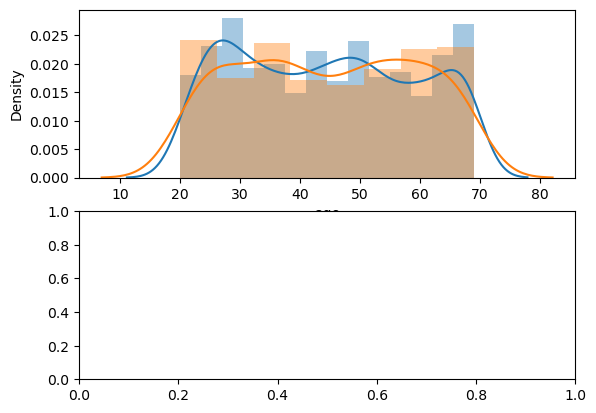

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(merge_data.query('premium == False').age, ax=ax[0])
sns.distplot(merge_data.query('premium == True').age, ax=ax[0])

In [ ]:
#3.4 task 6. Постройте график распределения числа успешных операций: 
x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [105]:
success_clients = merge_data.groupby('client') \
    .agg({'success' : 'sum'})

In [106]:
success_clients

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


/var/folders/fd/xq35rwrs5414xwrsmk_9w6hm0000gn/T/ipykernel_17748/367766683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_clients, kde=False)


<Axes: >

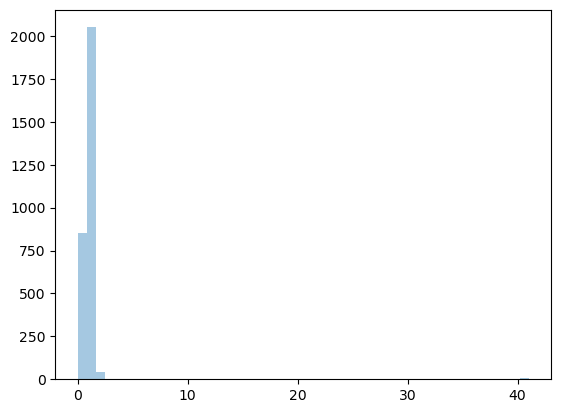

In [107]:
sns.distplot(success_clients, kde=False) #after 40 we see something

In [109]:
success_clients.success.value_counts()

success
1     2051
0      850
2       42
41       9
40       1
3        1
Name: count, dtype: int64

In [ ]:
#Conclusion: Бóльшая часть наблюдений сосредоточена в левой части графика
#Несколько клиентов совершили более 40 успешных действий

In [ ]:
#3.4.Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
#По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

#Полезные ссылки:
#sns.countplot – документация к типу графика
#figsize – про размер графиков
#Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

#(!!!!!) I did barplot, because i did not know about 'loc' method

In [133]:
success_count_data = merge_data.query('platform == "computer"') \
    .groupby('age') \
    .agg({'success': 'sum'}) \
    .rename (columns={'success' : 'success_count'}) \
    .sort_values('success_count')

In [134]:
success_count_data

,success_count
age,
53,5
56,6
22,8
30,8
55,9
66,9
41,10
34,10
45,11


<Axes: xlabel='age', ylabel='success_count'>

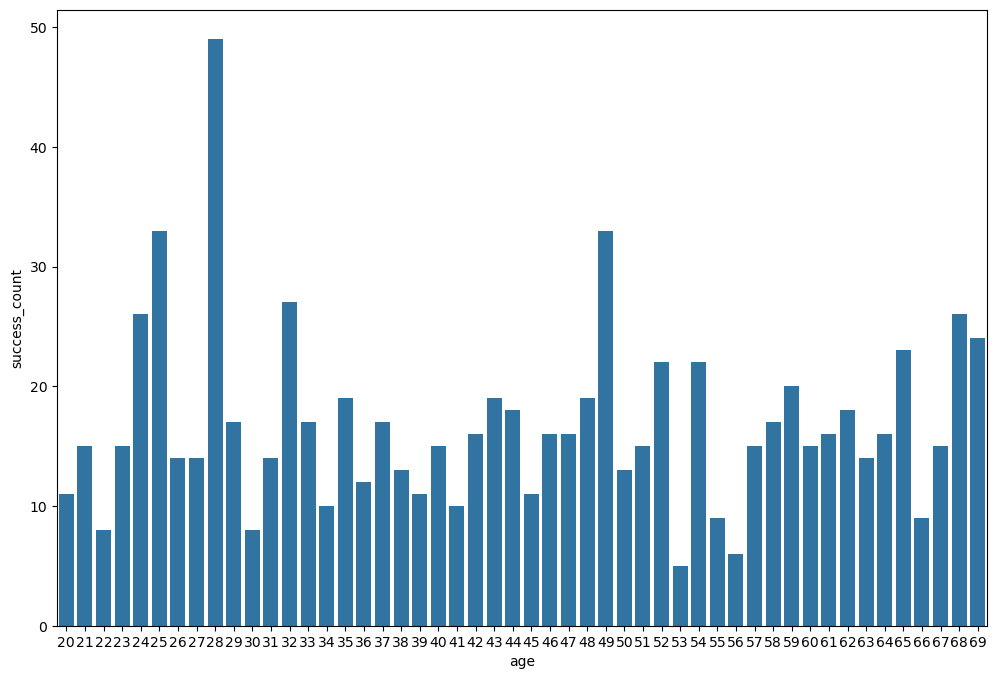

In [145]:
plt.figure(figsize=(12, 8))
sns.barplot(data=success_count_data, x='age', y='success_count')

In [ ]:
#method loc and countplot

<Axes: xlabel='age', ylabel='count'>

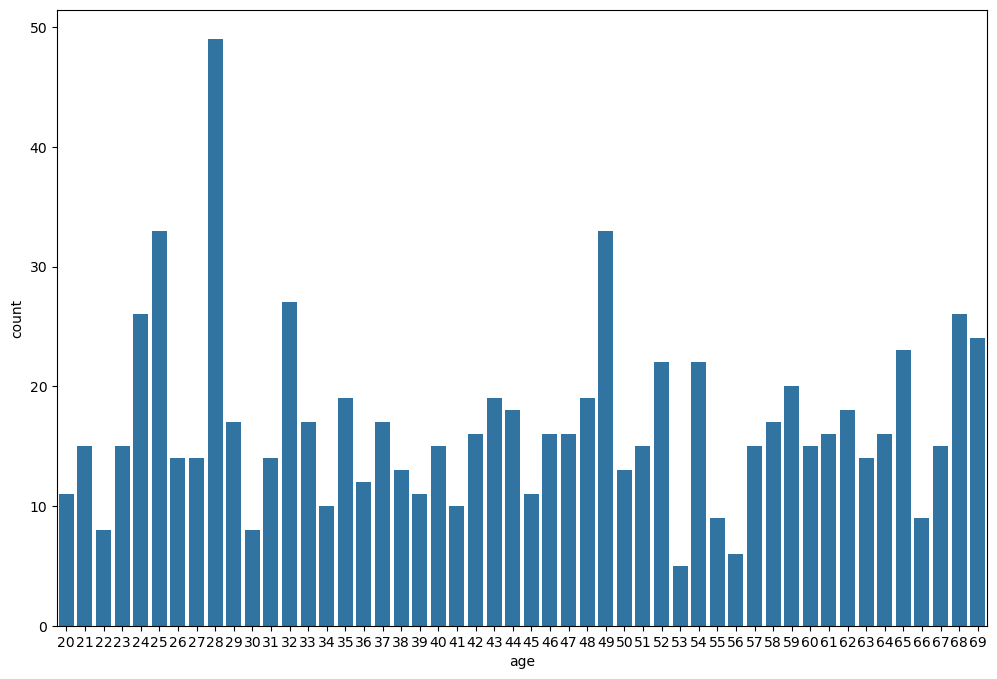

In [147]:
plt.figure(figsize=(12, 8))
sns.countplot(data=merge_data.loc[(merge_data.platform == 'computer')
                                    & (merge_data.success == True)], 
                x='age')